# Simple linear regression


# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
df = sns.load_dataset('mpg')

# Load data

mpg data : 연료 효율성 예측 데이터

mpg : miles per gallon  
cylinders : (엔진의) 실린더  
displacement : 이동거리  
horsepower : 마력  
weight : 무게  
acceleration : 가속도  
model year : 연식  
origin : 엔진을 만든 국가  
name : 모델명

# Exploratory Data Analysis

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### 데이터 자료형 확인

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


### 데이터 결측치 확인

In [8]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

### 데이터 통계 요약정보 확인

In [9]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### 컬럼 전체의 고유값 확인

### 누락데이터 행을 삭제

`데이터 결측치 확인` 파트에서 horsepower에 누락된 값(결측치)이 6개 존재하므로 누락된 부분이 포함된 행을 제거해줘야함

In [10]:
df.dropna(subset=['horsepower'], axis=0, inplace=True)

# 시각화

### 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인

#### Matplotlib 사용

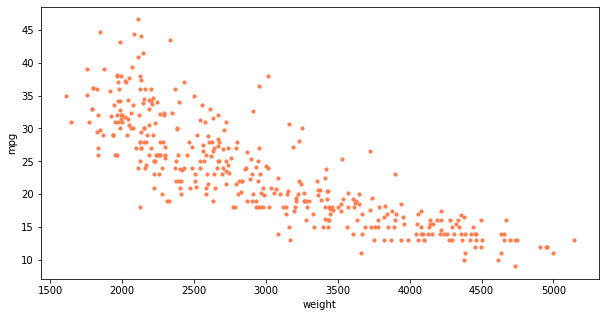

In [12]:
df.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5))
plt.show()

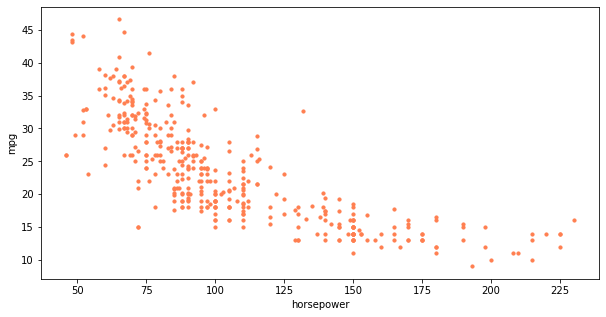

In [13]:
df.plot(kind='scatter', x='horsepower', y='mpg',  c='coral', s=10, figsize=(10, 5))
plt.show()

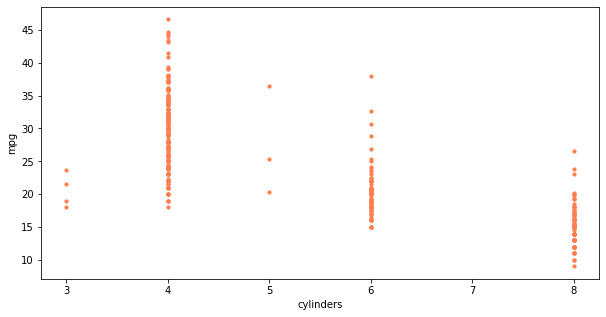

In [14]:
df.plot(kind='scatter', x='cylinders', y='mpg',  c='coral', s=10, figsize=(10, 5))
plt.show()

#### Seaborn 사용

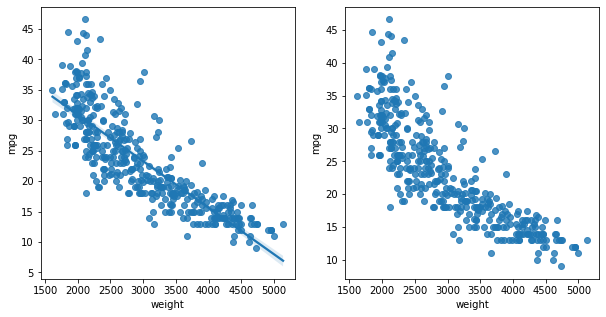

In [15]:
fig = plt.figure(figsize=(10, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=df, ax=ax1)                 # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=df, ax=ax2, fit_reg=False)  #회귀선 미표시
plt.show()
plt.close()

#### seaborn 조인트 그래프 - 산점도, 히스토그램

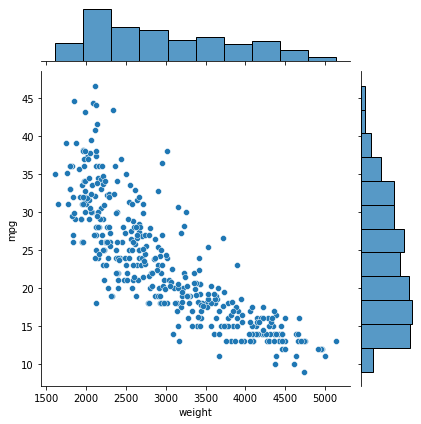

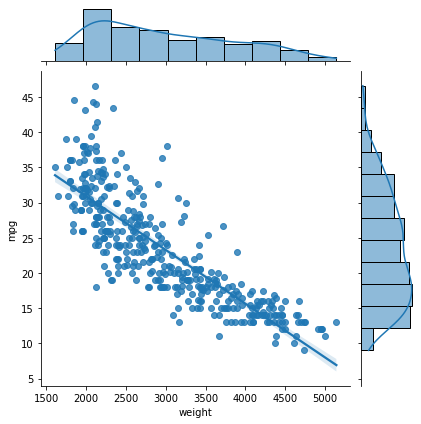

In [16]:
sns.jointplot(x='weight', y='mpg', data=df)              # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=df)  # 회귀선 표시
plt.show()
plt.close()

#### seaborn pariplot - 두 변수 간의 모든 경우의 수 그리기

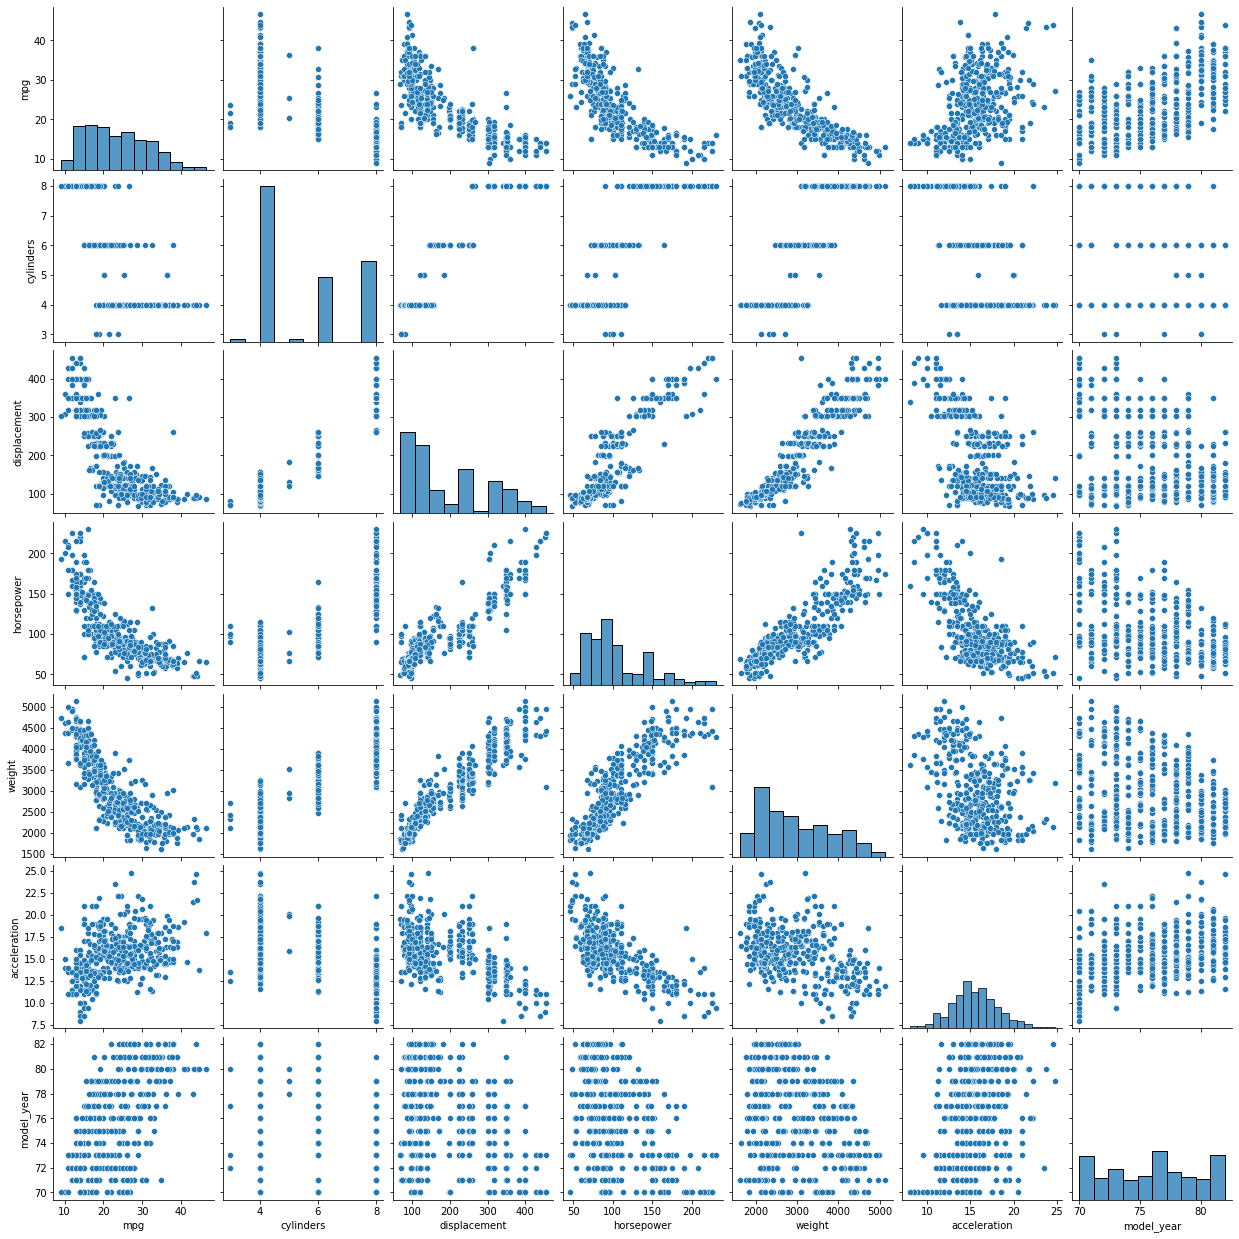

In [17]:
sns.pairplot(df)  
plt.show()
plt.close()

# Modeling

In [18]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


### EX) 차량 무게(weight)에 따른 mpg(miles per gallon) 연비 예측

In [19]:
X=df[['weight']]  #독립 변수 X
y=df['mpg']       #종속 변수 Y

In [20]:
X

,weight
0,3504
1,3693
2,3436
3,3433
4,3449
...,...
393,2790
394,2130
395,2295
396,2625


In [21]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

### train data 와 test data로 구분(7:3 비율)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값, 없어도됌

In [24]:
print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  274
test data 개수:  118


### 단순회귀분석 모형 객체 생성

In [25]:
lr = LinearRegression()

In [26]:
lr

LinearRegression()

### train data를 가지고 모델 학습

In [28]:
lr.fit(X_train, y_train)

LinearRegression()

### 학습을 마친 모델에 test data를 적용하여 결정계수(R-제곱) 계산

In [35]:
r_square = lr.score(X_test, y_test)
print(r_square)

0.6822458558299322


In [36]:
print('기울기 W: ', lr.coef_)

기울기 W:  [-0.00775343]


In [37]:
print('y절편 b', lr.intercept_)

y절편 b 46.7103662572801
